## Introduction

## Data Understanding

In [3]:
# Importing relevant libraries to be used.

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [4]:
#loading the dataset
Telecom_df = pd.read_csv("churn_in_telcom.csv")
#making a copy of the dataset
Telecom1_df = Telecom_df.copy(deep = True)
#checking the first 5 rows
Telecom1_df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Descriptive exploration
# a function to summarise the data set
# check number of categorical and numerical columns
def columns_dtypes(df):
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    print()
    print("These are the datatypes of column :")
    return df.dtypes

In [6]:
columns_dtypes(Telecom1_df)

This dataset has 3333 rows and 21 columns

Numerical columns: 16
Categorical columns: 4

These are the datatypes of column :


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
Telecom1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
Telecom1_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Numerical Columns
print(f"Numerical Columns: {Telecom1_df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {Telecom1_df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


## Data Preparation

## Data pre-processing
Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps

handling missing values
removing duplicates
correcting data format
transforming variables to make the data ready for modelling and predictions.


In [10]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with most null count.")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

In [11]:
check_duplicates_missing(Telecom1_df)

No column with missing values
No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
state,0.0,0,0.0
account length,0.0,0,0.0
area code,0.0,0,0.0
phone number,0.0,0,0.0
international plan,0.0,0,0.0
voice mail plan,0.0,0,0.0
number vmail messages,0.0,0,0.0
total day minutes,0.0,0,0.0
total day calls,0.0,0,0.0
total day charge,0.0,0,0.0


In [12]:
 #Exploratory Data Analysis
#checking for unique for unique data in the dataset
Telecom1_df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [13]:
# printing the unique values of the categorical variables

print(Telecom1_df['churn'].unique())
print(Telecom1_df['international plan'].unique())
print(Telecom1_df['voice mail plan'].unique())
print(Telecom1_df['customer service calls'].unique())
print(Telecom1_df['area code'].unique())


[False  True]
['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]
[415 408 510]


In [14]:
# Checking value_count of churn(target variable) column
Telecom1_df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

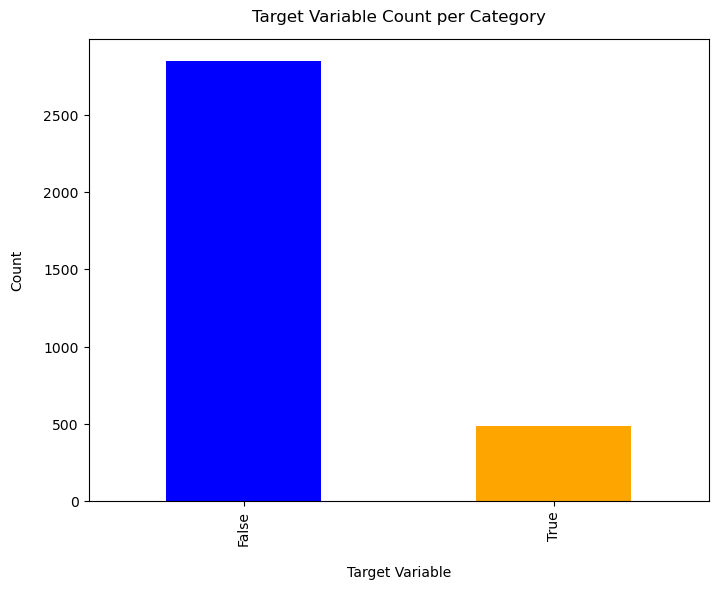

In [15]:
# overview of the target variable
churn_counts = Telecom1_df['churn'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Variable Count per Category", y=1.02)
plt.show()



In [16]:
#checking for the percentage rate of the churn
percentage_churn = 100 * Telecom1_df['churn'].value_counts() / len(Telecom1_df['churn'])
percentage_churn

False    85.508551
True     14.491449
Name: churn, dtype: float64

from the findings above the data is highly imbalanced

## Explaratory Data Analysis

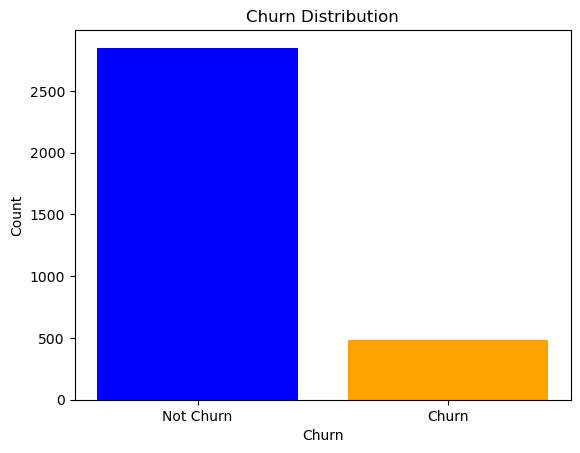

In [17]:
 #Univariate Analysis
#plotting the target variable distribution
class_counts = Telecom1_df.groupby("churn").size()

# Create a bar chart 
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Churn", "Churn"])

# Show the chart
plt.show()

From the bar graph above about 483 customers from the total 3333 in the dataset have terminated their contract and about the remaining 2850 are still customers.

In [18]:
#distribution of area code
# Pie chart of area code feature
area = Telecom1_df['area code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(Telecom1_df,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

From the analysis above close to half of the customers are in area 415 this is represented by the percentage 49.7%

## Distribution of the numerical features

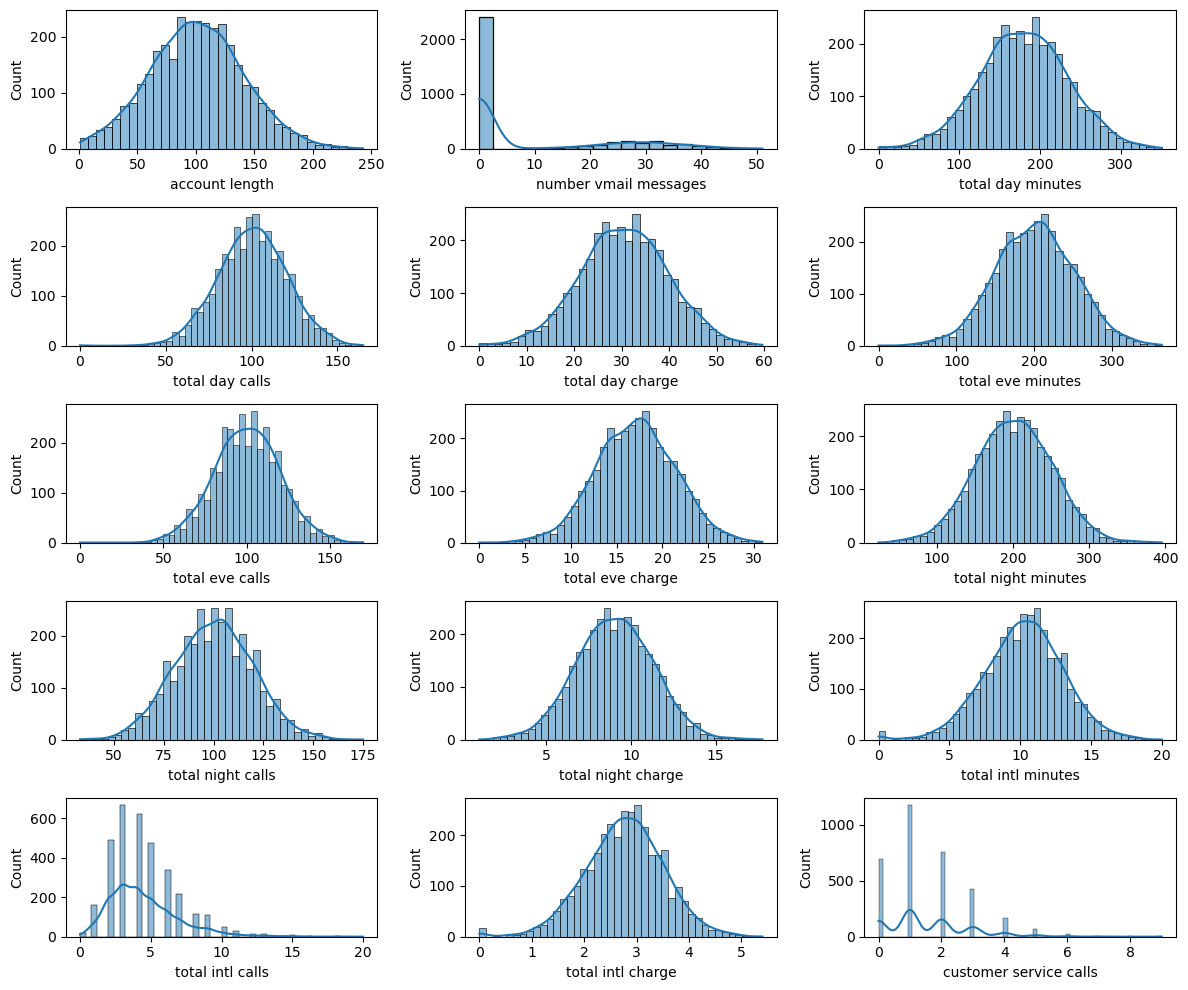

In [19]:


# List of numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge',
                    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(Telecom1_df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


From the visualization above the observations on the distribution of the numerical features can be seen
 1. The distribution in the Account length is positively skewed, indicating that the majority of customers have shorter account lengths. This suggests potential inaccuracies in predicting customer churn, as longer account lengths might be a more accurate predictor.

 2. The distribution of Number of Voice Mail Messages is relatively even, indicating that the number of voice mail messages is not a particularly strong predictor of customer churn.
 3. Total Day Minutes, Total Day Calls, and Total Day Charge: These features show a significant amount of potential noise in the data, as the distribution is positively skewed and there is a significant amount of overlap between the classes.

4. Total Evening Minutes, Calls, and Charge: These features show a similar pattern to the Total Day features, indicating potential noise and overlap between classes.

5. Total Nighttime Minutes, Calls, and Charge: The distribution of thie features is negatively skewed, indicating that the majority of customers have less activity at night. This suggests potential inaccuracies in predicting customer churn, as higher activity at night might be a more accurate predictor.
6. Total International Minutes, Calls, and Charge: These features show a similar pattern to the Total Day features, indicating potential noise and overlap between classes.

7. The distribution of Customer Service Calls is negatively skewed, indicating that the majority of customers have fewer customer service calls. This suggests potential inaccuracies in predicting customer churn, as higher customer service calls might be a more accurate predictor

## Distribution of the Categorical Features

In [20]:
#Checking the distribution of categorical features
def plot_categorical_distribution(Telecom1_df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=Telecom1_df,color='blue', order=Telecom1_df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

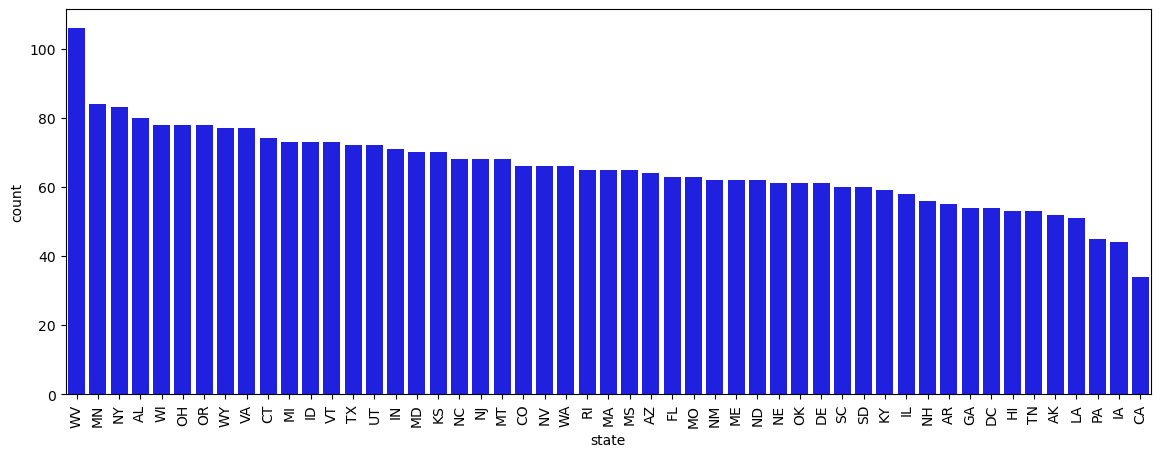

In [21]:
# State
plot_categorical_distribution(Telecom1_df,feature='state')

From the visualizaton above the states with highest customers are West Virginia,Minnesota,NewYork,Alabama and Wisconsin while Carlifonia has the lowest number of customers.


In [22]:
#International plan
Telecom1_df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

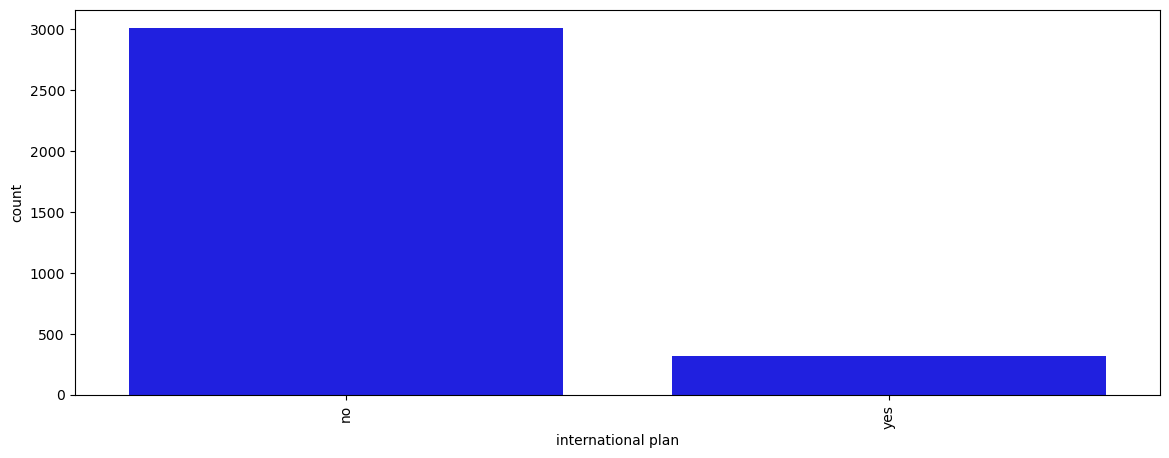

In [23]:

plot_categorical_distribution(Telecom1_df,'international plan')

From the visualization above the number of customers who have international plan is about 323 out of the total 3333.

In [24]:
#Voice mail plan
Telecom1_df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

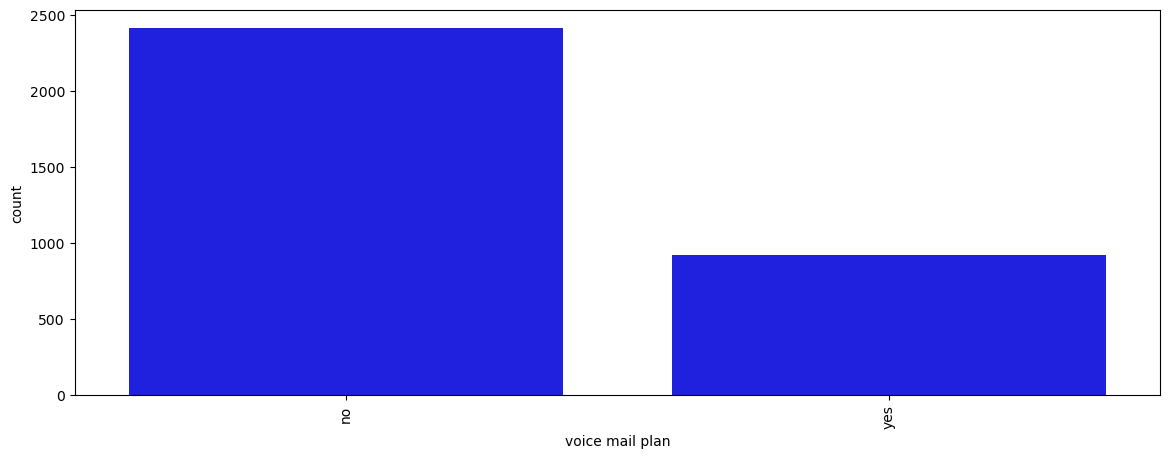

In [25]:
plot_categorical_distribution(Telecom1_df, 'voice mail plan')

From the visualization 922 customers have a voice mail plan

## Bivariate Analysis

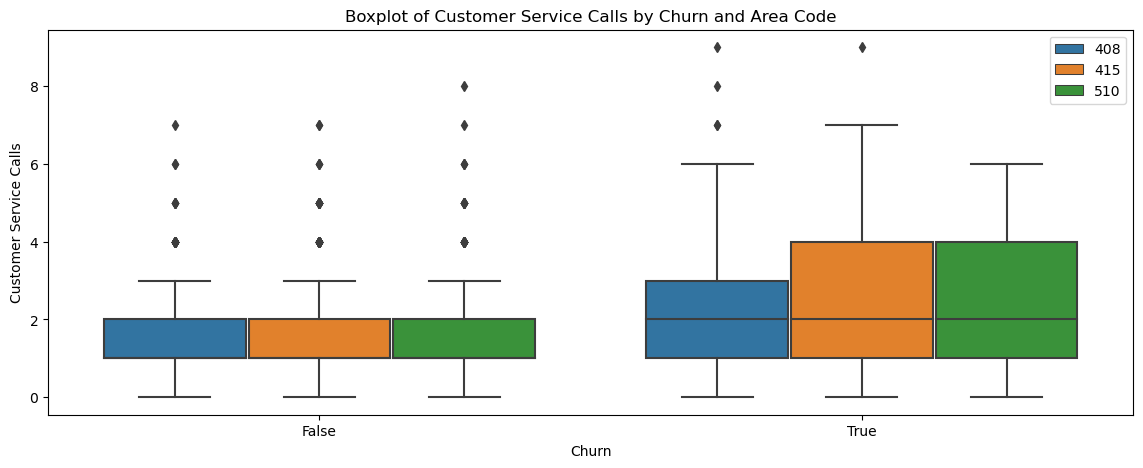

In [26]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=Telecom1_df, x='churn', y='customer service calls', hue='area code')
plt.legend(loc='upper right')
plt.title('Boxplot of Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

From the boxplot , most  the customers who have terminated their contract of are from area codes 415 and 510.There are number of  outliers in the data.

In [27]:
def plot_categorical_distribution(Telecom1_df, feature):
    """
    Plots the distribution of a categorical feature based on churn rate in the given data.
    """
    plt.figure(figsize=(10, 4))
    
    # Calculate churn rate for each category
    churn_rate = Telecom1_df.groupby(feature)["churn"].mean().sort_values(ascending=False)
    
    # Select top 10 categories based on churn rate
    top_10_categories = churn_rate.head(10).index.tolist()
    
    # Plot countplot with churn distribution
    sns.countplot(x=feature, hue="churn", data=Telecom1_df, order=top_10_categories)
    
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Distribution of {feature} based on Churn Rate')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


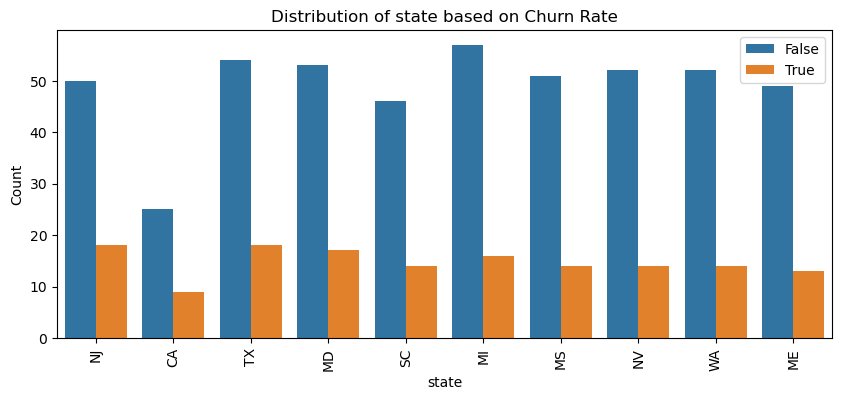

In [28]:
plot_categorical_distribution(Telecom1_df, 'state')

customers that churned, majority are from Texas, New Jersey, Maryland,Miami and NewYork

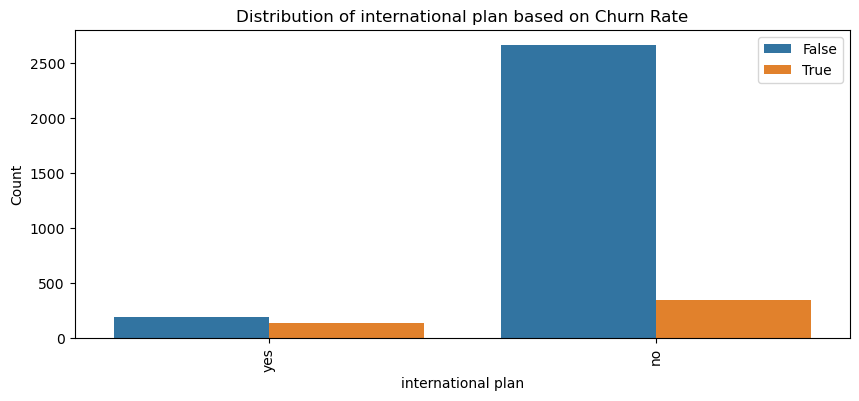

In [29]:
plot_categorical_distribution(Telecom1_df, 'international plan')

Most of the customers who churned did not have an international plan.

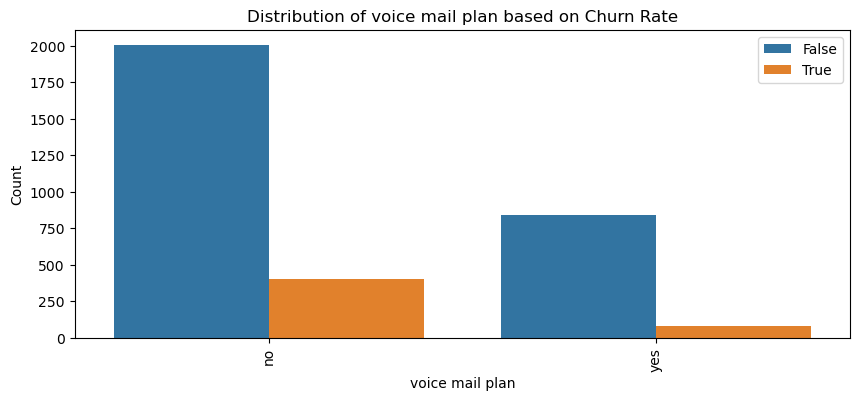

In [30]:
plot_categorical_distribution(Telecom1_df, 'voice mail plan')

Most customers who churned did not have an voicemail plan.

In [31]:
def plot_churn_kde(Telecom1_df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=Telecom1_df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

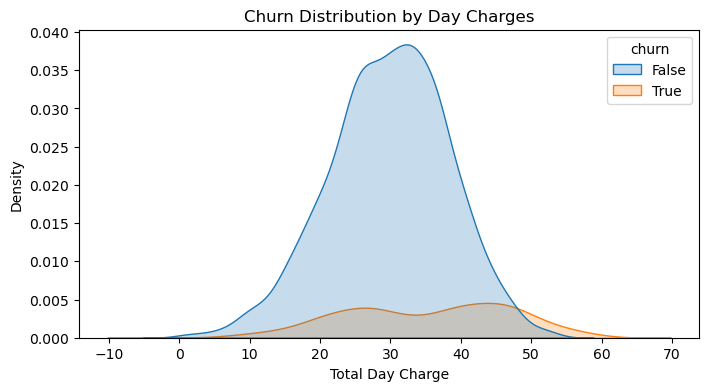

In [32]:
# Churn by day charges
plot_churn_kde(Telecom1_df, 'total day charge', 'Day')


The KDE plot depicting churn based on daily charges reveals a notable trend: customers who have terminated their accounts generally exhibit higher total day charges compared to those who haven't churned. This implies that individuals dissatisfied with the service or perceiving it as excessively costly during daytime hours might be more inclined to churn.







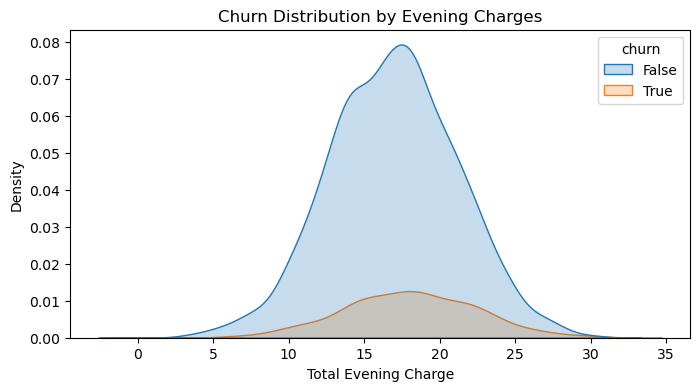

In [33]:
# Churn by evening charges
plot_churn_kde(Telecom1_df, 'total eve charge', 'Evening')

There is similarity with the distribution between customers who churn in the morning and evening based on the visualization.

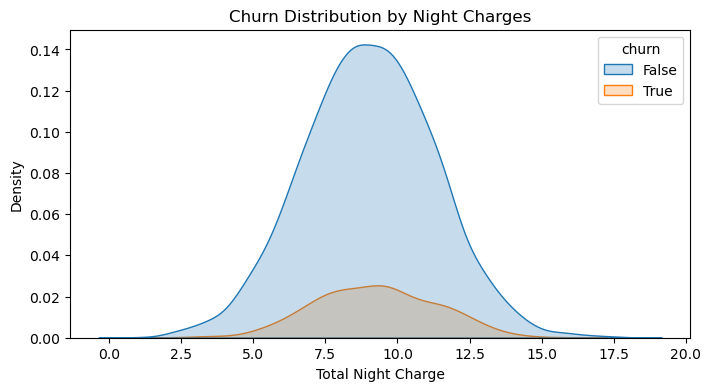

In [34]:
plot_churn_kde(Telecom1_df, 'total night charge', 'Night')

 churn by night charges shows a similar pattern to the churn by day charges and churn by evening charges plots. Customers who have terminated their accounts tend to have higher total night charges than customers who have not terminated their accounts.

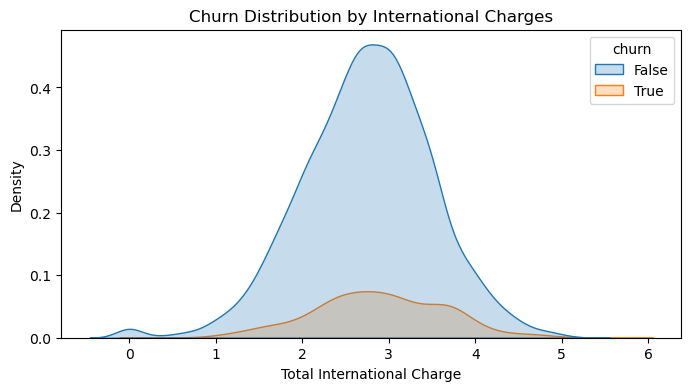

In [35]:
plot_churn_kde(Telecom1_df, 'total intl charge', 'International')

From the distribution customers with higher total international charges have a slightly higher likelihood of churning.

## Dealing with outliers

In [36]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(Telecom1_df)
print(Telecom1_df.shape)

(3169, 21)


## Correlation 


In [37]:
def corrmatrix(Telecom1_df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(10,6))

    corr = Telecom1_df.corr()

    # Generate a mask to only show the bottom triangle
    corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(bool))

    sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);
    plt.title('Correlation of Features')
    plt.show()

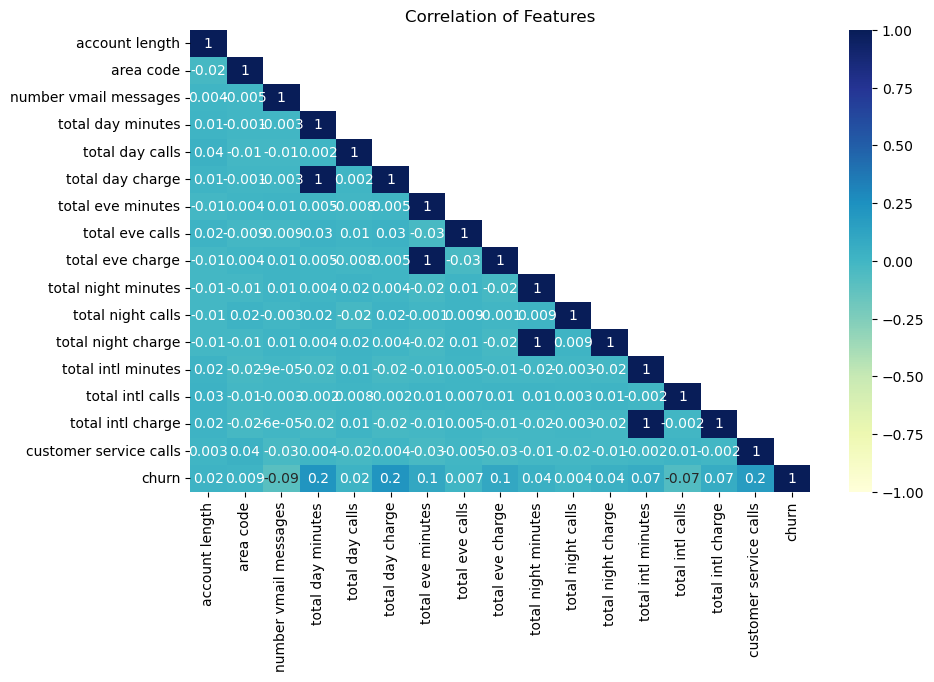

In [38]:
corrmatrix(Telecom1_df)

From the matrix above we can conclude that most of the features are not correlated.The features that are correlated have a strong positive relationship between the other features.This means when one feature increases, the other features also tends to increase.
Some of the features that are correlated are:
1. Total day charge and total day minutes features have a srong positive correlation.
2. Total evening charge and total evening minutes features have a strong positive correlation.
3. Total night charge and total night minutes features are fully positively correlated.
4. Total int charge and total int minutes features are fully positively correlated.
These features can be seen to fall on the dark blue grid  which shows how strongly they are correlated

Some of the features that are close to the 0 mean that there is no linear relationship between the features.
 Correlation values close to -1 mean that there is a strong negative relationship between the features. This means when one feature increases, the other feature tends to decrease.
For the features that are perfectly correlated this is because the charges are a direct result of the minutes used. 

## Multicollinearity

In [39]:
corr_matrix = Telecom1_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]
# Drop the features
Telecom1_df = Telecom1_df.drop(to_drop, axis=1) 
Telecom1_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False


The rows and columns that are highly correlated have been dropped

## Feature Engineering.

Label Encording

In [40]:
# Converting the columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
Telecom1_df['churn'] = label_encoder.fit_transform(Telecom1_df['churn'])
Telecom1_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


One Hot Encoding

This will  convert categorical columns into binary (0/1) vectors.

In [41]:
Telecom1_df = pd.get_dummies(Telecom1_df, columns=['state', 'area code', 'international plan', 'voice mail plan'])
Telecom1_df.head()


,account length,phone number,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,382-4657,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,1,0,1,0,0,1
1,107,371-7191,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,1,0,1,0,0,1
2,137,358-1921,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,1,0,1,0,1,0
3,84,375-9999,0,71,50.90,88,5.26,89,8.86,7,...,0,0,0,1,0,0,0,1,1,0
4,75,330-6626,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,1,0,0,1,1,0


Data scaling

In [42]:
def scale_column(column_values):
    return scaler.fit_transform(column_values.values.reshape(-1, 1))

scaler = MinMaxScaler()

numerical_columns = Telecom1_df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    Telecom1_df[column] = scale_column(Telecom1_df[column])

Telecom1_df.head()

,account length,phone number,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.587963,382-4657,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,371-7191,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,358-1921,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.384259,375-9999,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.342593,330-6626,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Modeling

The dataset we are working on is an example of a binary classification problem  which predicts churn (whether a customer will churn or not). This will  use a basic logistic regression model.The model will be evaluated on the recall score. Specifically, if it achieves an recall score of 80% or higher, it will be considered a success.

To accomplish the outlined objectives specified in the project proposal, we plan to leverage a combination of diverse machine learning algorithms. The selected algorithms, each offering unique advantages, are tailored to address specific aspects of the project requirements. The following algorithms will be employed:
1. Logistic Regression
2. Decision Tree
3.Random Forest

In the assessment of our model performances, the ROC_AUC metric will be employed as a key evaluation measure. The ROC_AUC  is a comprehensive metric particularly well-suited for binary classification problems. It considers both sensitivity and specificity across various threshold levels, providing a robust indication of a model's ability to discriminate between classes.

Addressing the challenge of class imbalance within our dataset, we will SMOTE. Class imbalance, where one class significantly outnumbers the other, can lead to biased models that predominantly predict the majority class. SMOTE will serve as a crucial technique for mitigating this imbalance by generating synthetic instances of the minority class, thereby leveling the playing field during model training.

In [43]:
#Data Splitting
#Features
X = Telecom1_df.drop('churn', axis=1)  
#Target variable
y = Telecom1_df['churn']  

Train-Test Split
Splitting data into train and test sets using a test_size of 0.2and a random_state 123

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Using SMOTE to deal with class imbalance in the target variable